In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import seaborn as sns
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install xgboost
import warnings
warnings.filterwarnings("ignore")


#import classification models from sckitlearn
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

#Import evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
#pip install numpy pandas scikit-learn tensorflow

In [ ]:
#loading dataset
data = pd.read_csv(r"/content/Customer-Churn.csv")

In [ ]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,tenure_category,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,new_customer,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,mid_level_customer,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,new_customer,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,mid_level_customer,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,new_customer,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,new_customer,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,longtenure_customer,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,new_customer,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,new_customer,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
data2 = data.copy

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   tenure_category   7043 non-null   object 
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


In [ ]:
# Convert 'TotalCharges' column to float
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Check the data types of columns after conversion
print(data.dtypes)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
tenure_category      object
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [ ]:
data.duplicated().sum()

0

In [ ]:
data1 = data.copy()

In [ ]:
#checking statiscal describtion
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [ ]:
cat_df = data.select_dtypes(include ="object")

In [ ]:
cat_df.describe().T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
tenure_category,7043,3,new_customer,3210
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088


In [ ]:
cat_df.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'tenure_category',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'Churn'],
      dtype='object')

In [ ]:
# investigate the missing data
null_vals = data.isnull().sum()
null_vals

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
tenure_category      0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

# UNIVARIATE VISUALIZATION

<Axes: xlabel='TotalCharges', ylabel='Count'>

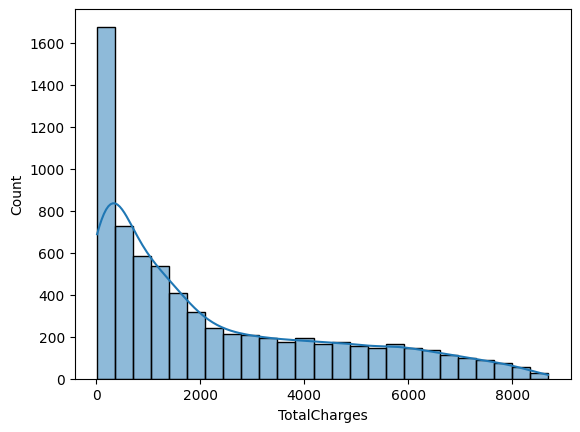

In [ ]:
#univariate distribution of Total Charges
sb.histplot(data['TotalCharges'],kde=True)

In [ ]:
# when the data is Normally Distributed, we use mean median or mode
# WHEN THE DATA IS SKEWED WE USE THE MEDIAN.....bcos the median is not affected by outliers

In [ ]:
#The total charges will be calculated and replaced with the median.
totalcharge_median = data["TotalCharges"].median()

data["TotalCharges"] = data["TotalCharges"].fillna(totalcharge_median)

In [ ]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
tenure_category     0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#statistical description of categorical data
data.describe(exclude=["float64","int64"])

,customerID,gender,Partner,Dependents,tenure_category,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,3,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,new_customer,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,3210,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [ ]:
data.drop(columns=["customerID"], inplace=True)

In [ ]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,tenure_category,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,new_customer,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,mid_level_customer,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,new_customer,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,mid_level_customer,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,new_customer,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,new_customer,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,longtenure_customer,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,new_customer,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,new_customer,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
# Convert categorical columns to category type for easier plotting
#cat_columns = data.select_dtypes(['object']).columns
#data[cat_columns] = data[cat_columns].astype('category')#

In [ ]:
#cat_columns

In [ ]:
#data[cat_columns]

In [ ]:
# Select numerical features only
num = data.select_dtypes(include=['int', 'float'])

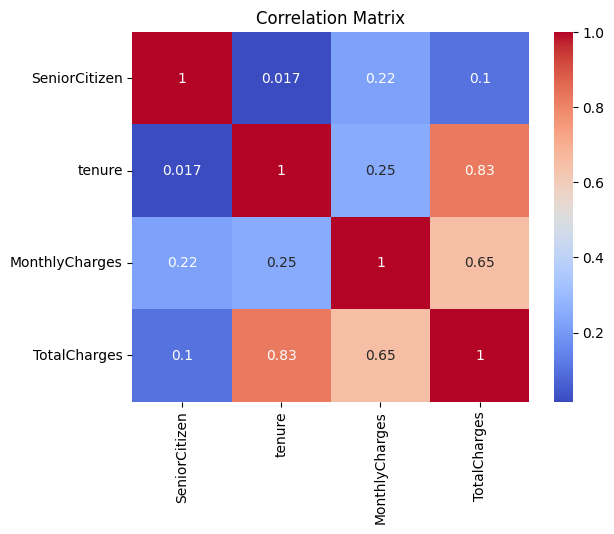

In [ ]:
# Explore correlations between numerical variables using a correlation matrix
correlation_matrix = num.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<Axes: >

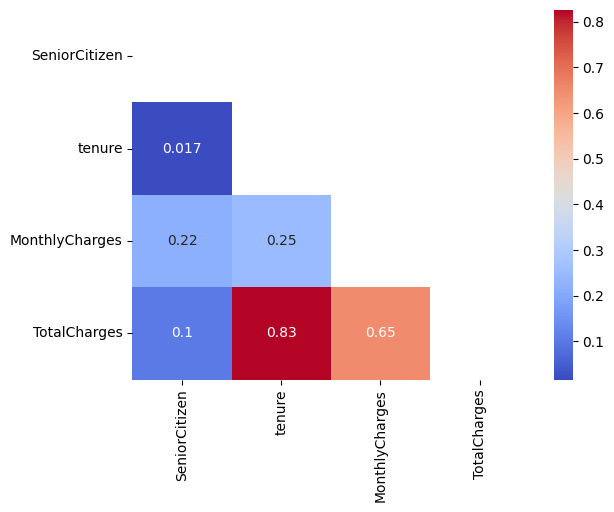

In [ ]:
# create a correllation plot for numerical features
mask = np.triu(np.ones_like(num.corr(), dtype = bool))
sns.heatmap(data=num.corr(), cmap="coolwarm", annot=True, mask =mask)

In [ ]:
#data1.drop(columns=["customerID"], inplace=True)

In [ ]:
# Select numerical features only
obj = data.select_dtypes(include=['object'])

In [ ]:
obj

,gender,Partner,Dependents,tenure_category,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,new_customer,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,mid_level_customer,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,new_customer,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,mid_level_customer,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,new_customer,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,Yes,Yes,new_customer,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,Yes,Yes,longtenure_customer,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,Yes,Yes,new_customer,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,Yes,No,new_customer,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [ ]:
!pip install dython

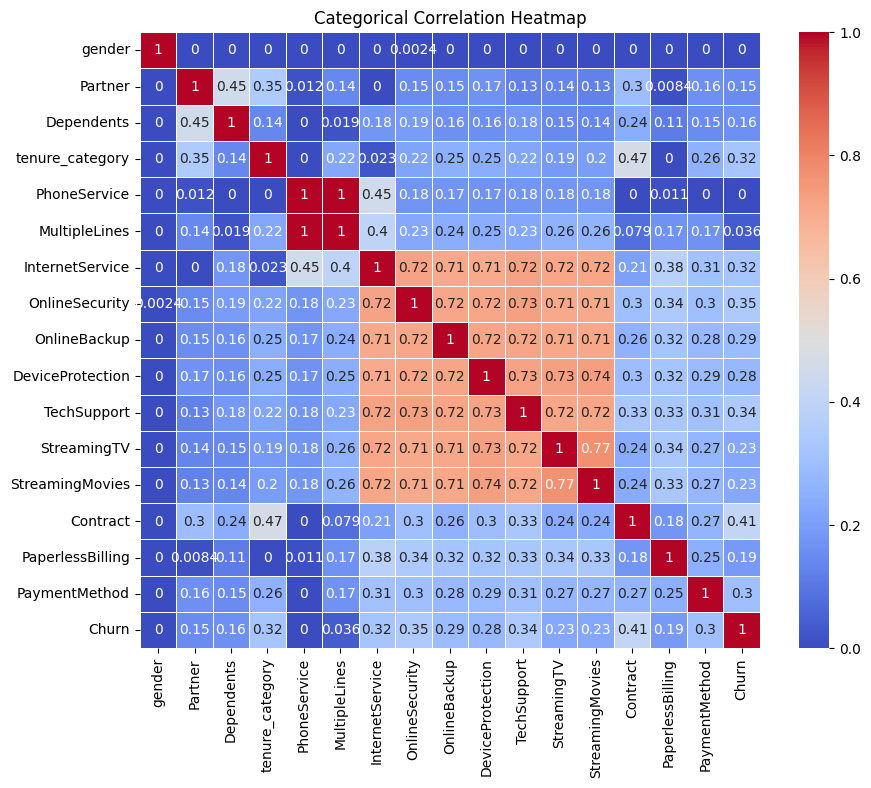

In [ ]:
from dython.nominal import cramers_v
# Calculate Cramer's V statistic for pairwise correlation between categorical variables
categorical_columns = obj.select_dtypes(include=['object']).columns
correlation_matrix = pd.DataFrame(index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        correlation_matrix.loc[col1, col2] = cramers_v(data[col1], data[col2])
        # Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Categorical Correlation Heatmap')
plt.show()


<Axes: >

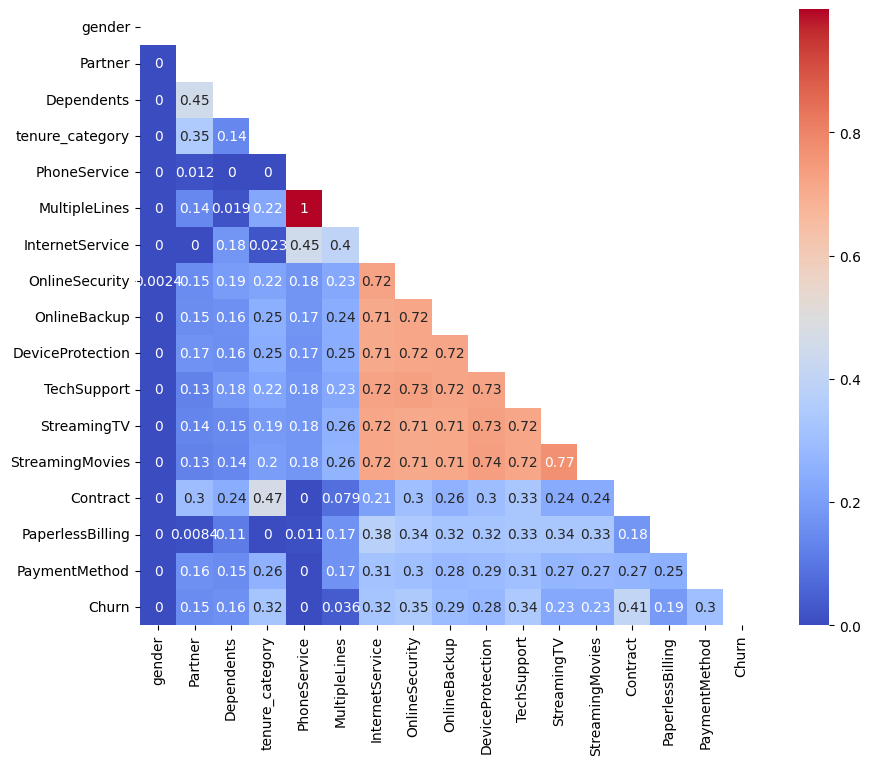

In [ ]:
# create a correlation plot for numerical features
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='coolwarm', mask=mask)

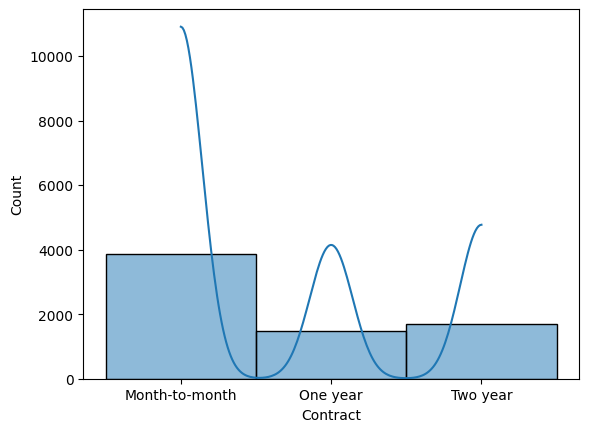

In [ ]:
#univariate distribution of the dependent variable
sb.histplot(data1['Contract'],kde=True);

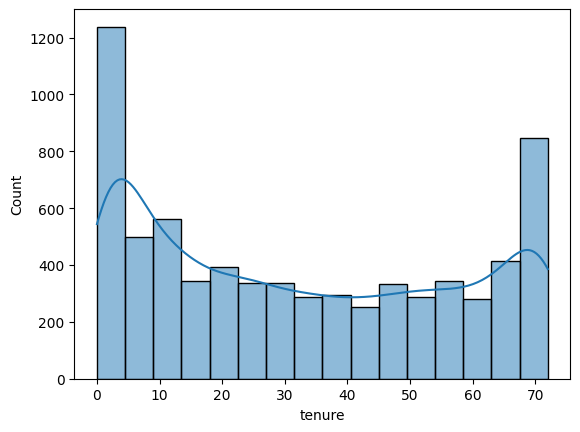

In [ ]:
#univariate distribution of the dependent variable
sb.histplot(data1['tenure'],kde=True);

In [ ]:
#function that calculates and adds pecentage to graph plots
def perc_plot(plot,feature):
  total = len(feature)
  for p in plot.patches:
    perc = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(perc,(x,y), size=12)
  plt.show()

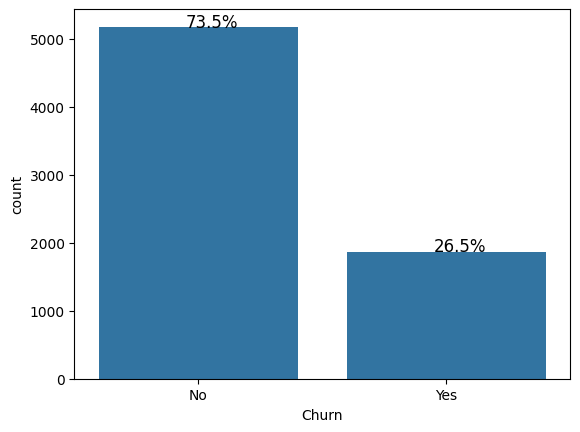

In [ ]:
#univariate distribution of Churn
ax = sb.countplot(x='Churn',data=data)
perc_plot(ax,data1['Churn'])

In [ ]:
#This Plot shows the Churn rtae of CONNECTTEL
# 1869/7043*100 = 26.5%
# 5147/7043*100 = 73.5%

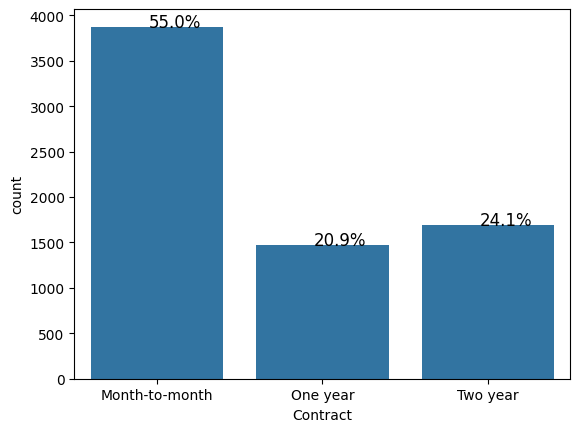

In [ ]:
ax = sb.countplot(x='Contract',data=data)
perc_plot(ax,data1['Contract'])

## BI-variate analysis

<Axes: xlabel='Churn', ylabel='tenure'>

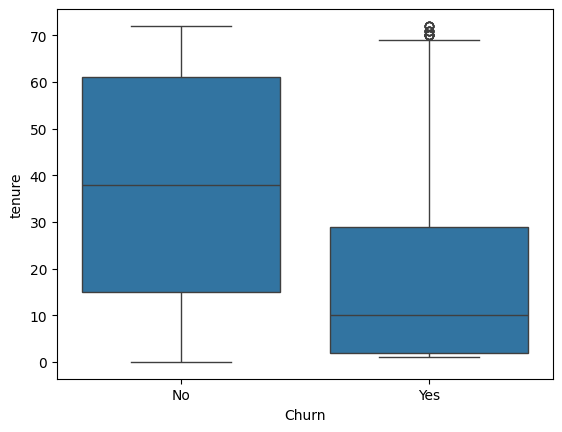

In [ ]:
#bivariate distribution of the dependent variable
sb.boxplot(x='Churn',y='tenure',data=data1)

In [ ]:
#this boxplot show that new subscribers who had a short stay or short tenure with the company are the customers who churned the most

<Axes: xlabel='TotalCharges', ylabel='MonthlyCharges'>

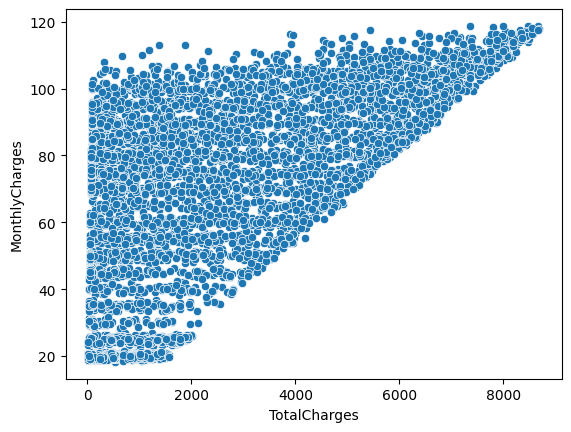

In [ ]:
#bivariate distribution of the dependent variable
sb.scatterplot(x='TotalCharges',y='MonthlyCharges',data=data1)

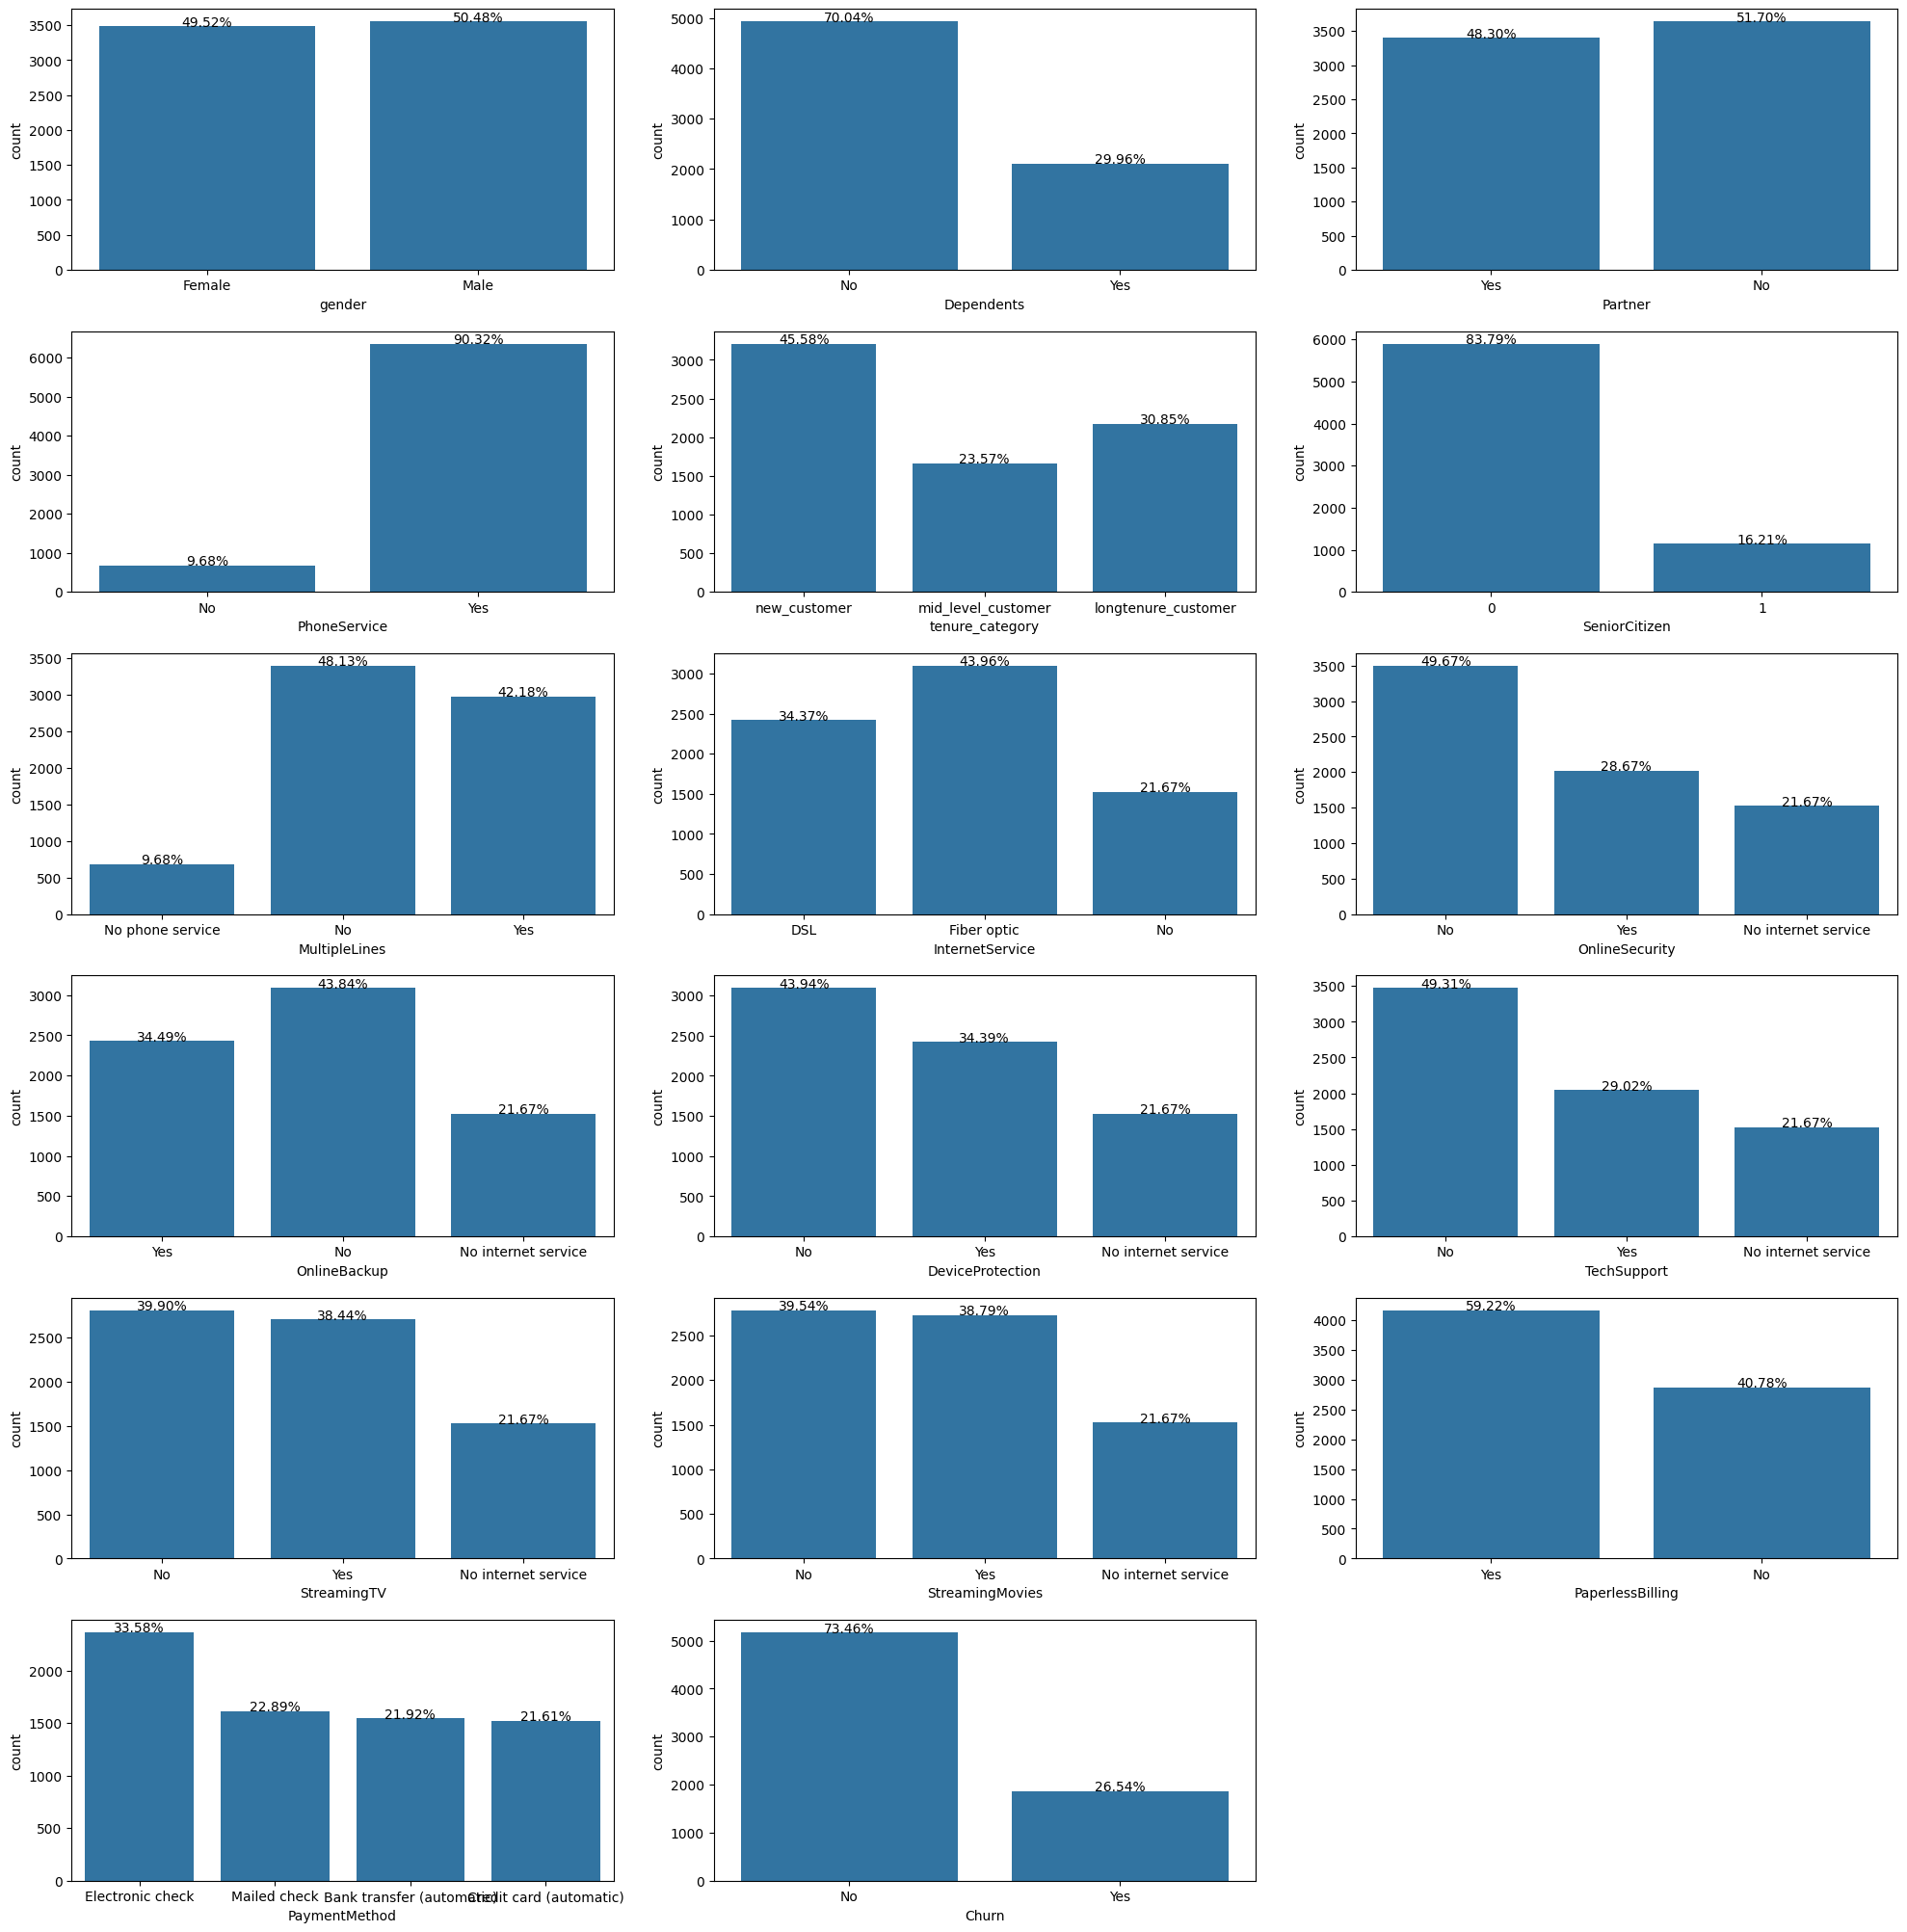

In [ ]:
feature_list=['gender', 'Dependents', 'Partner','PhoneService','tenure_category','SeniorCitizen',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Churn']

num_cols=3
num_rows= (len(feature_list) +1)//2


fig, axes =  plt.subplots(ncols = num_cols, nrows= num_rows, figsize=(20,30))
axes=axes.flatten()

for index, feature in enumerate(feature_list):
    ax = axes[index]
    sns.countplot(data=data1, x= feature, ax=ax)


     # Calculate percentages
    total = float(len(data1[feature]))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 3,
                '{:.2f}%'.format((height / total) * 100),
                ha="center")


plt.tight_layout();
for ax in axes[len(feature_list):]:
    fig.delaxes(ax)

- ### THE VISUALIZATION ABOVE SHOWS THE COUNT OF ALL CATEGORICAL FEATURES OF CONNECTTEL CUSTOMER CHURN DATA
1. From the visualization above, it is was observed that the Gender category(male(49.52%) & female(50.48%) and the Partner category(Yes(48.30%) & No(51.70%) have a close ratio individually, while customers with No dependant(70.04%) are relatively higher than those with dependant(29.96%).

2. We realized that customers with Phone Services(90.32%) are way higher than those without Phone Services(9.68%). Secondly, we have more Senior Citizen customers(83.79%) than Non Senior citizens(16.21%). Also, we have more customers in the New_customers category(45.58%) than customers in the Mid_level(23.57%) and Long_tenure category(30.85%).

3. We noticed from the visual plot above that Customers with No MultipleLines(43.84%) are a a bit higher than those who have MultipleLines(42.18%) while customers with "No phone services" are (9.68%). Also,
Customers in the Internet service category use more of Fibre_optics(43.96%) followed by DSL(34.37%) and those without internet service are (21.67%). It was also noted that a lot of customers have NO Online security(49.67%), while customers with Online security are (28.6%) next to that we have cutomers with "No intenet service"(21.67%).

4. We identified Customers who have NO online backup to be(43.84%) more than those who have online backup(34.49%) and those with "No intenet service(21.67%). We were able to spot customers with No Device protection(43.94%) and those with Deviceprotection to be(34.39%) while those with "No internet services" are(21.67%). we also observed a lot of customers with No tech support(49.31%)and those with tech support(29.02%) while customers who have "No internet service" are(21.67%)

5. We were able to view Streaming activities from customers and we spotted customers who streamTv(38.44%) those who do not (39.90%)and those who have "no internet service" to stream(21.67%).we also identified customers who streamTMovies(38.79%) those who do not(39.54%) and those without internet service for streaming(21.67%)

6. We examined the payment method category and we found out that a lot of customers prefer to use Electronic billing(33.58%)compared to Mailed check(22.89%) Bank tranfer(21.92%)and Credit Card(21.61%).

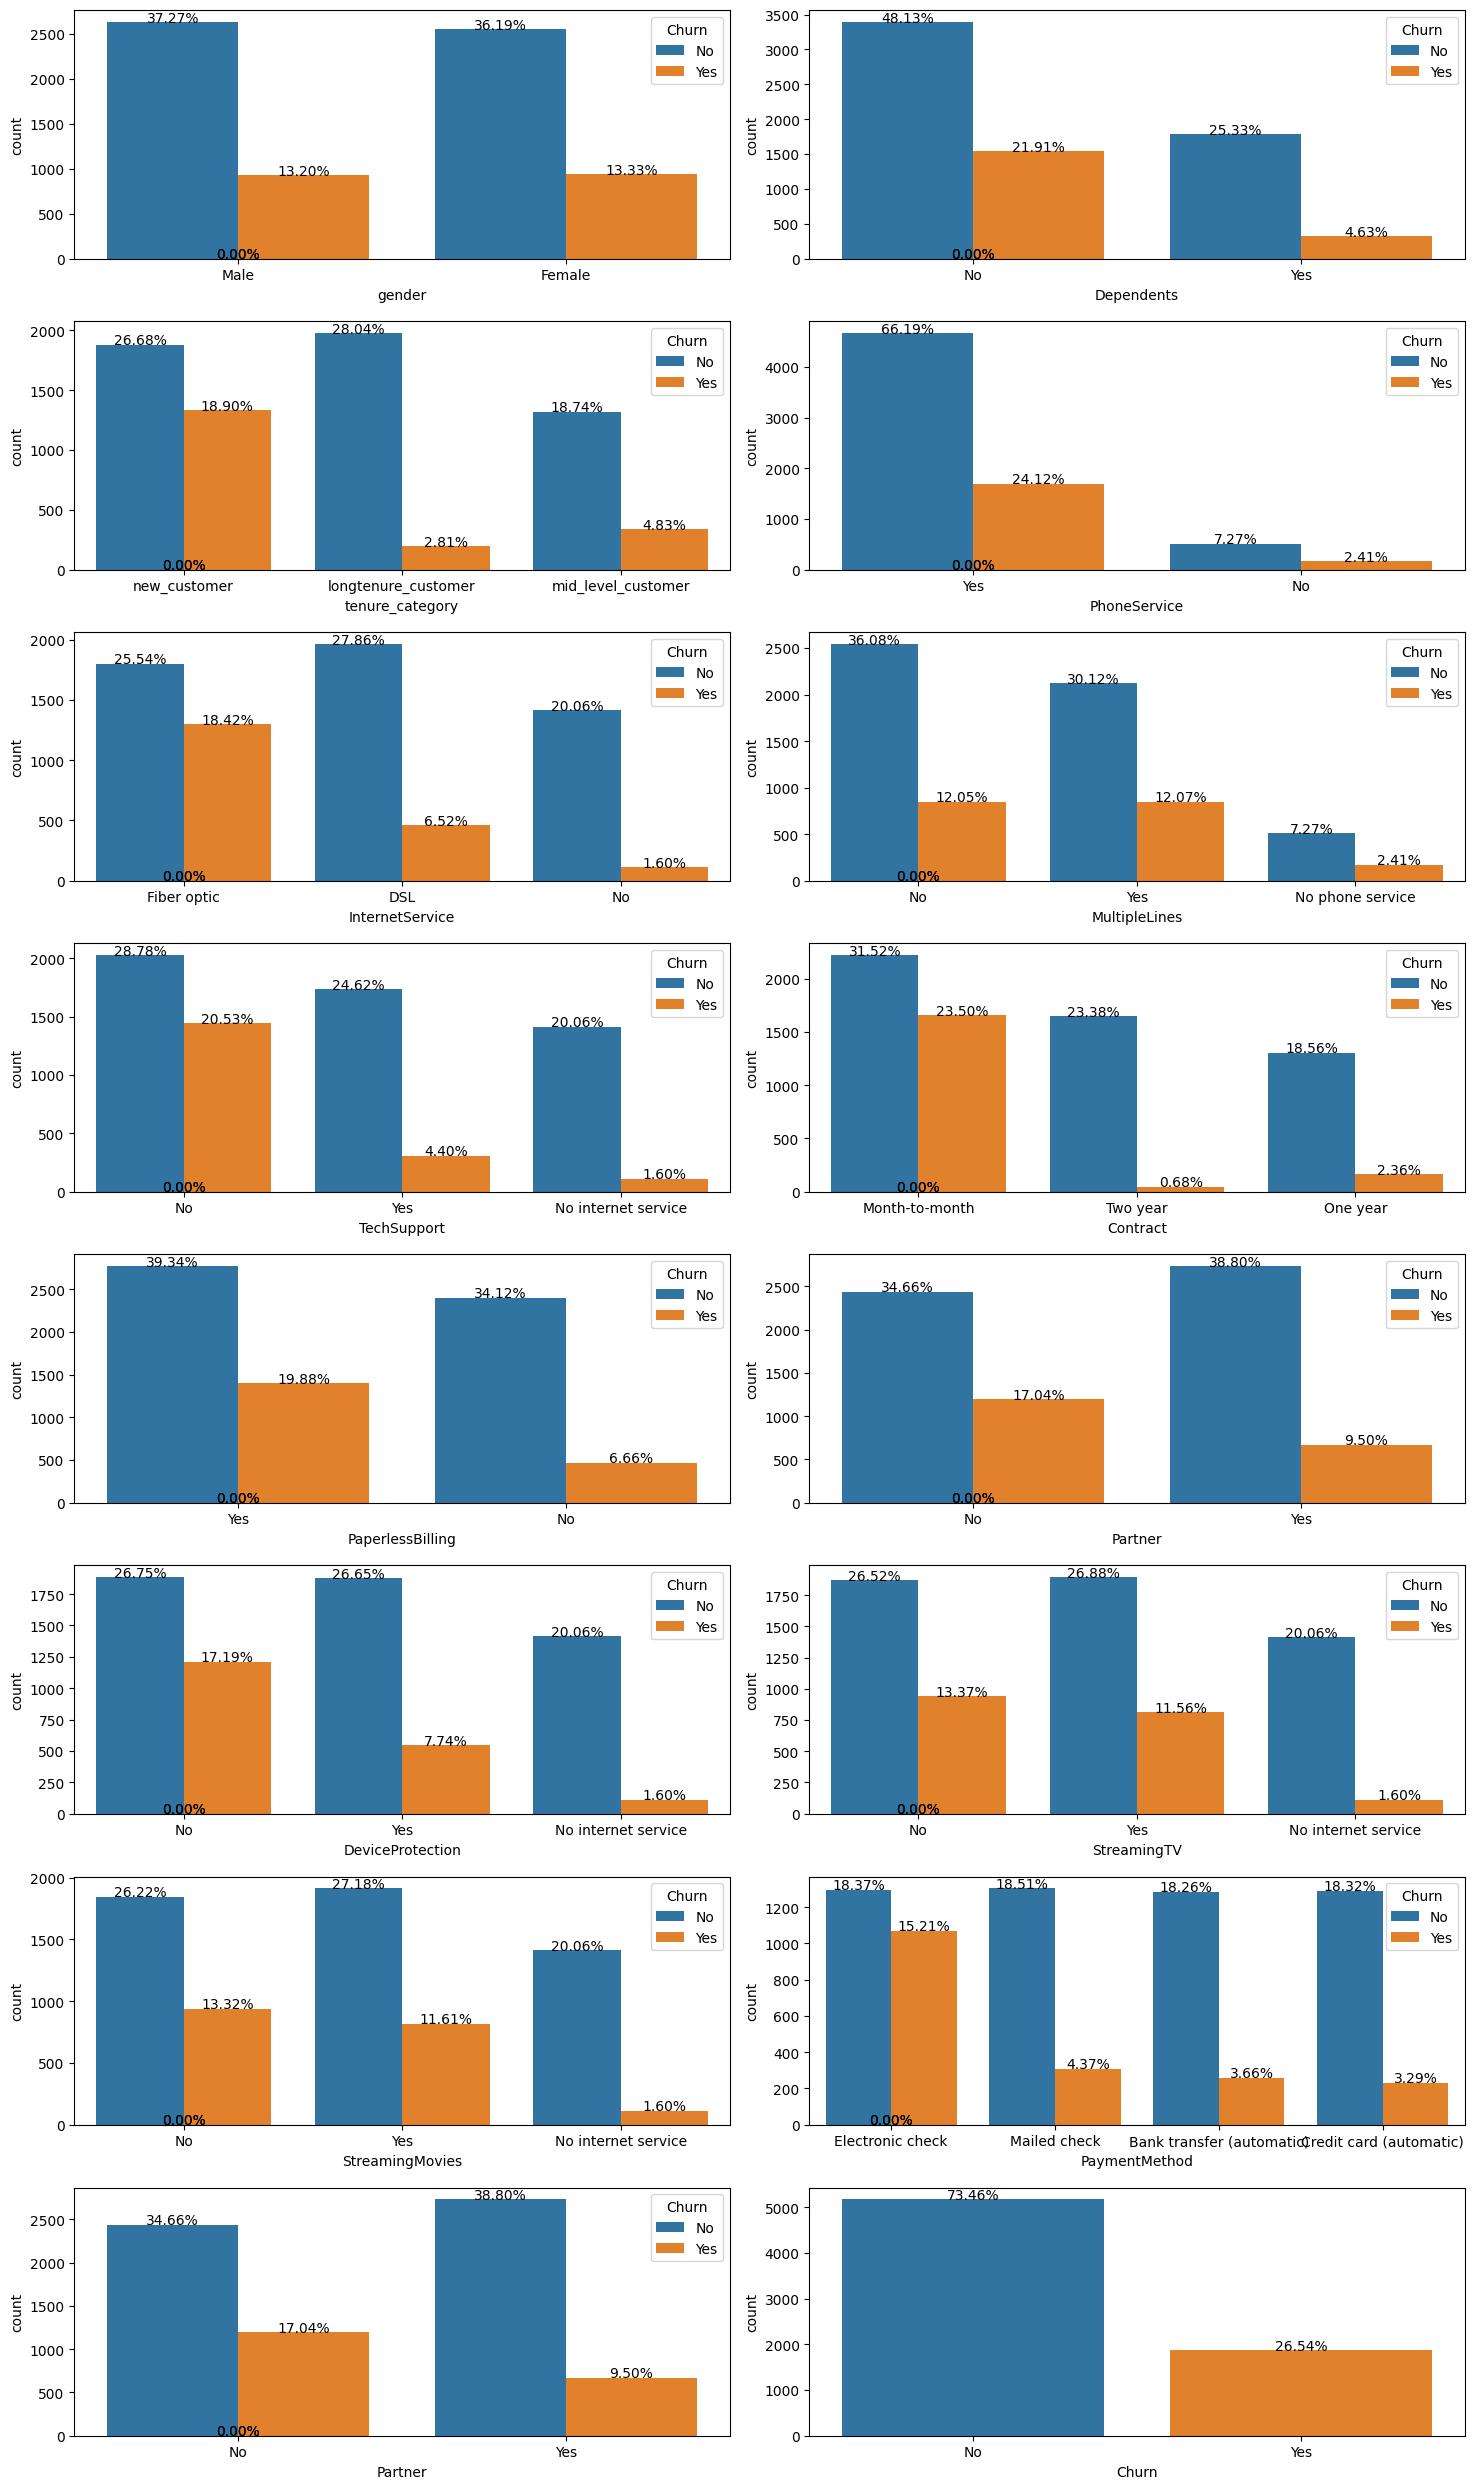

In [ ]:
feature_list=['gender', 'Dependents', 'tenure_category',
              'PhoneService','InternetService','MultipleLines',
              'TechSupport','Contract', 'PaperlessBilling','Partner',
               'DeviceProtection','StreamingTV', 'StreamingMovies',
              'PaymentMethod', 'Partner', 'Churn']

num_cols=2
num_rows= (len(feature_list) +1)//2


fig, axes =  plt.subplots(ncols = num_cols, nrows= num_rows, figsize=(15,25))
axes=axes.flatten()

for index, feature in enumerate(feature_list):
    ax = axes[index]
    sns.countplot(data=data1, x= feature, ax=ax, order=cat_df[feature].value_counts().index, hue= "Churn")


     # Calculate percentages
    total = float(len(data1[feature]))
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2.,
                height + 3,
                '{:.2f}%'.format((height / total) * 100),
                ha="center")


plt.tight_layout();
for ax in axes[len(feature_list):]:
    fig.delaxes(ax)

###### Analysing each Category with relative to Churn rate
- (a) The churn rate for the GENDER category has Male(13.20%) and Female(13.23%).
- (b) The churn rate is a bit higer for subscribers without Dependents(21.91%) as compared with subscribers with Dependents(4.63%)
- (C) There churn rate is high for New_customers(18.90%) compared to Mid_level(2.81%) and Long_Tenure customers(4.83%)
- (d) There churn rate is a bit higer for PhoneService subscribers(24.12%) as compared with Non PhoneService subscribers(2.41%)
- (e) For the internet service category the Fibre optics churn rate is very high(18.42%) comapared to DSL(6.52%) and No internet Service(1.60%)
- (f) There churn rate for customers who use Multiple lines and those who do not(12.05% and 12.07)are relatively close compared to "No phone service"(2.41%).
- (g) There churn rate for customers with no tech support is vey high(20.53%) AND with customers on a Monthly Contract (23.50%)
- (h) We have a High Churn rate for customers who use Paperlessbilling (19.88%)AND customers with no partners (17.04%)
- (i)

In [ ]:
data1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,tenure_category,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,new_customer,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,mid_level_customer,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,new_customer,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,mid_level_customer,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,new_customer,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,new_customer,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,longtenure_customer,Yes,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,new_customer,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,new_customer,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


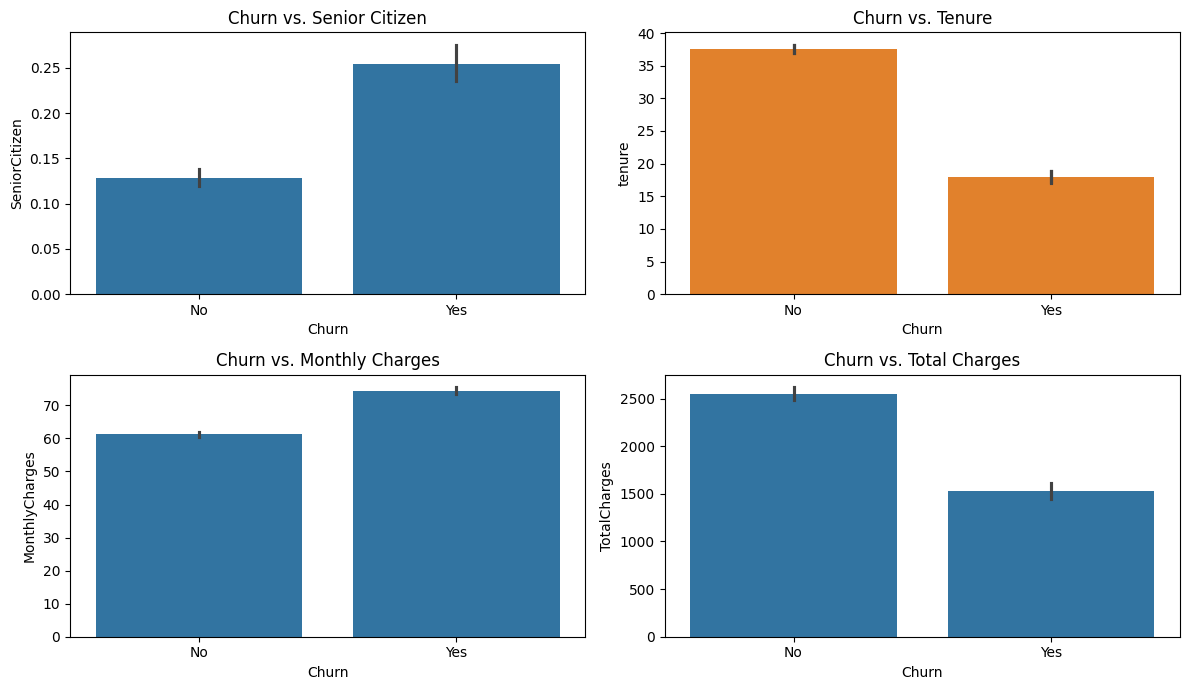

In [ ]:
# Visualize relationships between churn and some key Numerical features
plt.figure(figsize=(12, 7))

# Plot churn vs. paperless billing
plt.subplot(2, 2, 1)
sns.barplot(data=data1, x='Churn', y='SeniorCitizen')
plt.title('Churn vs. Senior Citizen')

# Plot churn vs. contract type
plt.subplot(2, 2, 2)
sns.barplot(data=data1, x='Churn', y='tenure')
plt.title('Churn vs. Tenure')


# Plot churn vs. contract type
plt.subplot(2, 2, 2)
sns.barplot(data=data1, x='Churn', y='tenure')
plt.title('Churn vs. Tenure')


# Plot churn vs. partner
plt.subplot(2, 2, 3)
sns.barplot(data=data1, x='Churn', y='MonthlyCharges')
plt.title('Churn vs. Monthly Charges')


# Plot churn vs. internet service
plt.subplot(2, 2, 4)
sns.barplot(data=data, x='Churn', y='TotalCharges')
plt.title('Churn vs. Total Charges')


plt.tight_layout()
plt.show()

#  MULTI-VARIATE VISUALIZATION

<Axes: xlabel='Contract', ylabel='tenure'>

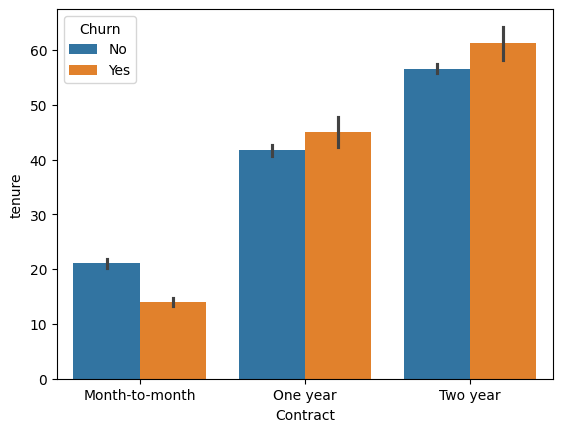

In [ ]:
sb.barplot(x='Contract',y='tenure',hue='Churn',data=data1)

- M-M = 3876, 1yr = 1474, 2yrs = 1696
- This plot shows the Chun rate of Contract to Tenure
- this shows that over a long period of time customers within two years and A year contract churn more than those on a monthly conract

<Axes: xlabel='Partner', ylabel='tenure'>

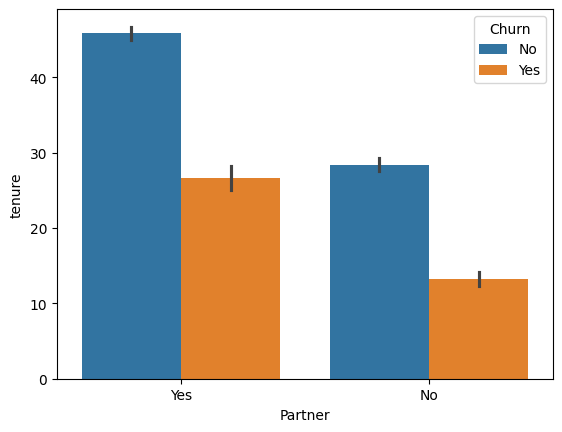

In [ ]:
sb.barplot(x='Partner',y='tenure',hue='Churn',data=data1)

- This plot shows the Chun rate of Partner to Tenure over the years
- this shows a high churn rate on customers who have partner to customers do not have

<Axes: xlabel='TechSupport', ylabel='tenure'>

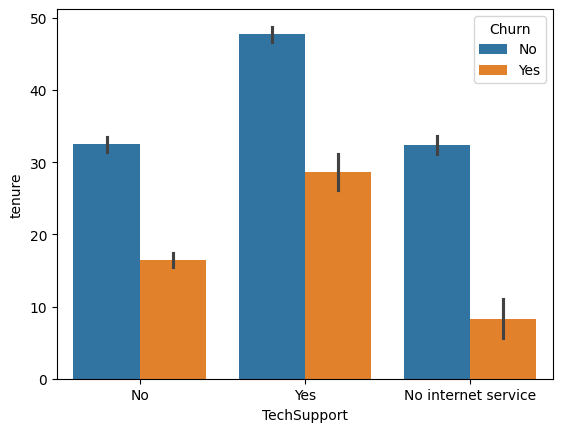

In [ ]:
sb.barplot(x='TechSupport',y='tenure',hue='Churn',data=data1)

- This plot shows the Chun rate of TechSupport to Tenure
- this shows that over a long period of time customers with Techsupport churn more than those without Support and
"No intrenet service

<Axes: xlabel='PaymentMethod', ylabel='tenure'>

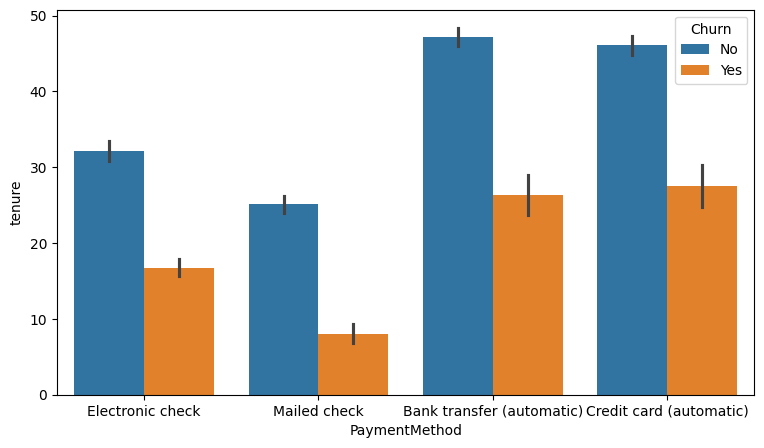

In [ ]:
plt.figure(figsize=(9, 5))
sb.barplot(x='PaymentMethod', y='tenure',hue='Churn',data=data1)

- This plot shows the Chun rate of PaymentMethod to  MonthlyCharges
- this shows that over a long period of time a lot of Customers Churned when it comes to MonthlyCharges on all Payment method

<Axes: xlabel='OnlineSecurity', ylabel='tenure'>

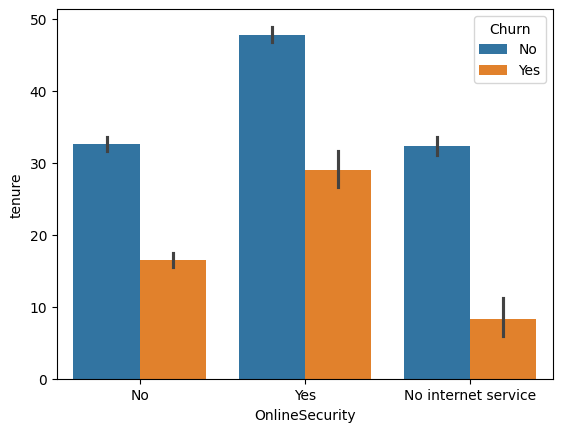

In [ ]:
sb.barplot(x='OnlineSecurity', y='tenure',hue='Churn',data=data1)

<Axes: xlabel='OnlineBackup', ylabel='tenure'>

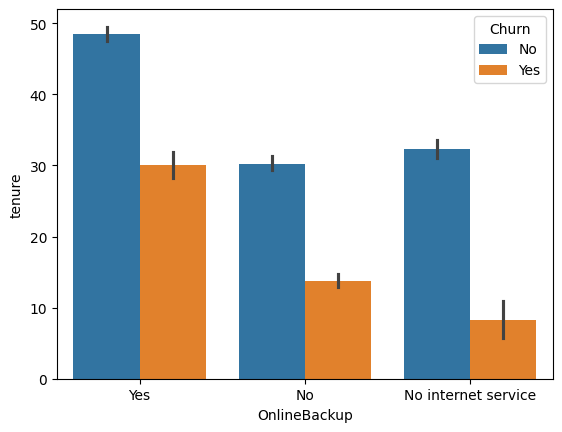

In [ ]:
sb.barplot(x='OnlineBackup', y='tenure',hue='Churn',data=data1)

<Axes: xlabel='DeviceProtection', ylabel='tenure'>

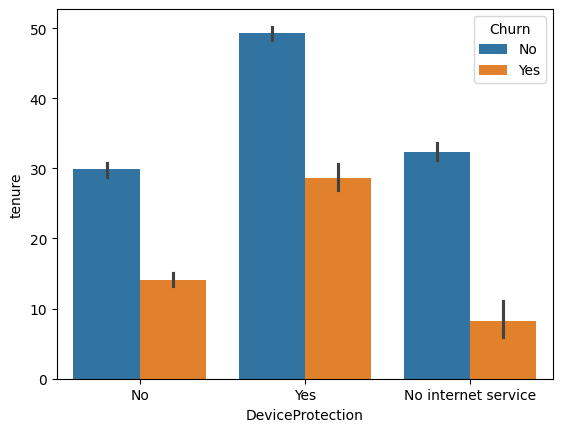

In [ ]:
sb.barplot(x='DeviceProtection', y='tenure',hue='Churn',data=data1)

<Axes: xlabel='StreamingTV', ylabel='tenure'>

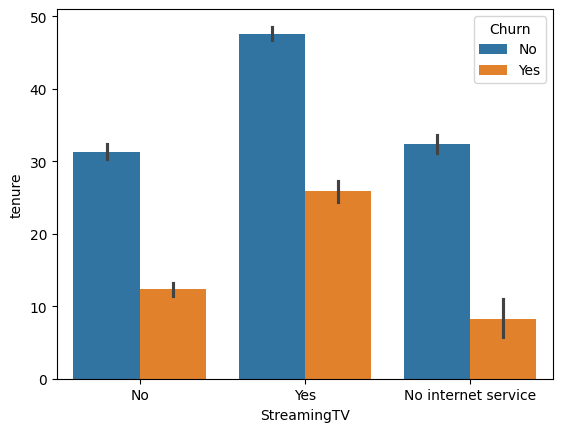

In [ ]:
sb.barplot(x='StreamingTV', y='tenure',hue='Churn',data=data1)

In [ ]:
data1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'tenure_category', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

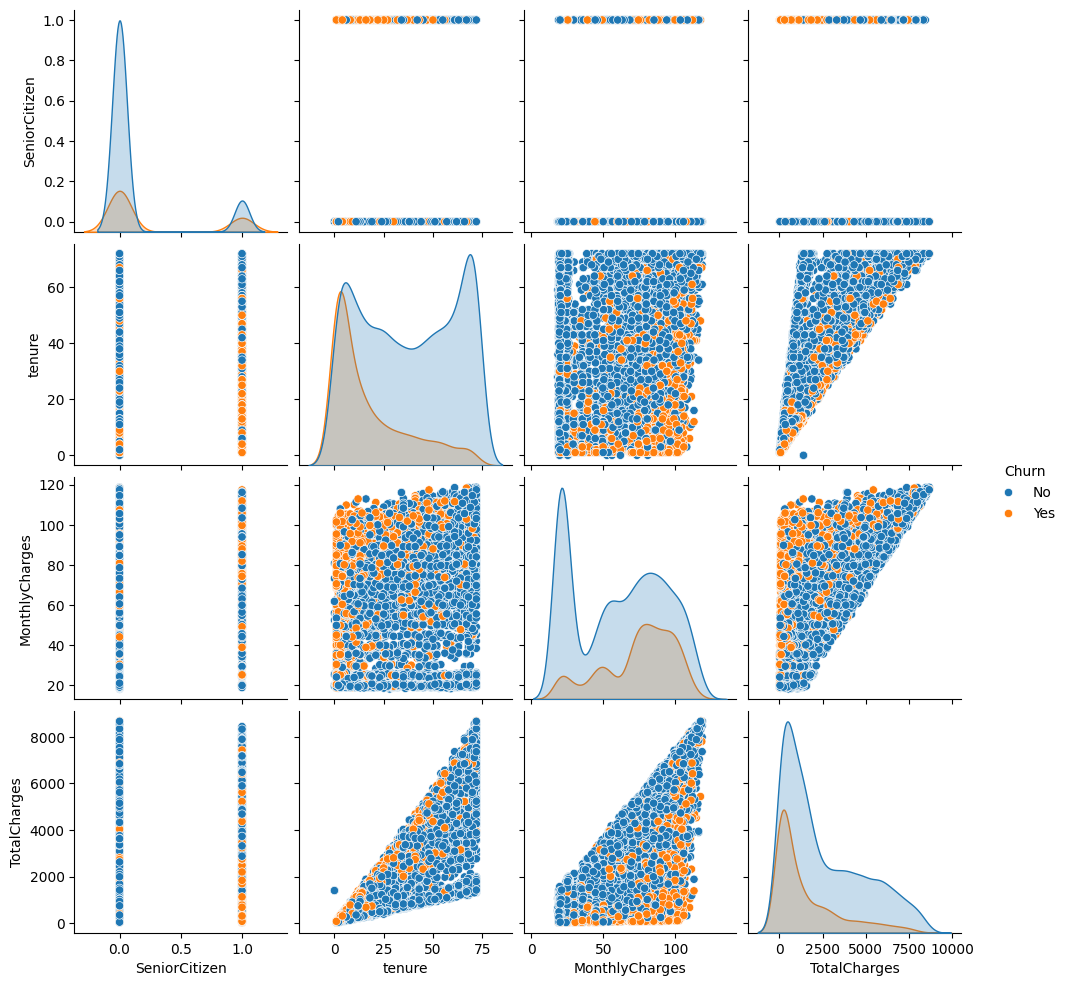

In [ ]:
sns.pairplot(data,hue = "Churn")

## CLASSIFICATION ANALYSIS
In classification analysis the goal is to build a predictive model that will "CLASSIFY" output.

### Phase 1
- Preparing and Processing Data for Modelling
- variable encoding
- segment data
- scale & nomalize data

In [ ]:
#data.drop(columns=["tenure_category"], inplace=True)

In [ ]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,tenure_category,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,new_customer,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,mid_level_customer,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,new_customer,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,mid_level_customer,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,new_customer,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,new_customer,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,longtenure_customer,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,new_customer,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,new_customer,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
#from sklearn.preprocessing import LabelEncoder
#import category_encoders as ce
# Create DataFrame
data = pd.DataFrame(data)

# Perform one-hot encoding
df = pd.get_dummies(data,dtype="int64",drop_first=True)


# Initialize BinaryEncoder
#binary_encoder = ce.BinaryEncoder(data)
# Fit and transform data
#data = binary_encoder.fit_transform(obj)



    # Define columns to be encoded
#columns_to_encode = [#'gender', 'Partner', 'Dependents', 'PhoneService','tenure_category',
                     #'MultipleLines', 'InternetService', 'OnlineSecurity',
                    # 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                    #'StreamingTV', 'StreamingMovies', 'Contract',
                     #'PaperlessBilling', 'PaymentMethod','Churn']

# Initialize LabelEncoder
#label_encoder = LabelEncoder()

# Encode categorical columns
#for column in columns_to_encode:
    #data[column] = label_encoder.fit_transform(data[column])

In [ ]:
#data

In [ ]:
df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,tenure_category_mid_level_customer,tenure_category_new_customer,PhoneService_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,1,...,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,0,1,1,...,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,0,1,1,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,1,1,1,0,1,1,...,1,0,1,1,0,1,0,0,1,0
7039,0,72,103.20,7362.90,0,1,1,0,0,1,...,1,0,1,1,0,1,1,0,0,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,0,0,1,0,1,0,0
7041,1,4,74.40,306.60,1,1,0,0,1,1,...,0,0,0,0,0,1,0,0,1,1


In [ ]:
#segment data set
y = df.pop("Churn_Yes")

In [ ]:
#y = data.pop('Churn')

In [ ]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn_Yes, Length: 7043, dtype: int64

In [ ]:
#!pip install tpot

In [ ]:
#scaling dataset
#importing the standard scaler
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [ ]:
#instantiate scaler
scaler = MinMaxScaler()

#instantiate scaler object
#scaler = StandardScaler()

#instantiate Robustscaler
#scaler = RobustScaler()

# Create a Normalizer object
#scaler = Normalizer()

scaled_df = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)


In [ ]:
# We tried different scaling methods but the MinMax Scaler gave the best result

In [ ]:
#data.info()

In [ ]:
#segment data set
#yf = data.pop("Churn")

In [ ]:
#yf

In [ ]:
#split data into training and validation sets
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(scaled_df,y,test_size=0.2,random_state=42)

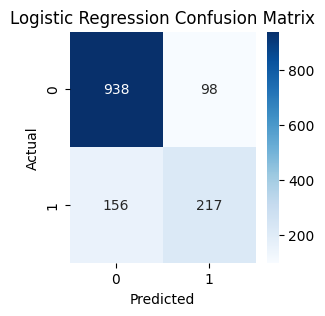

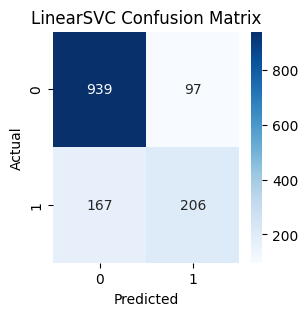

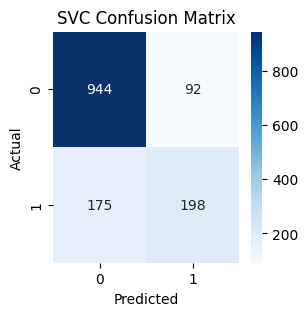

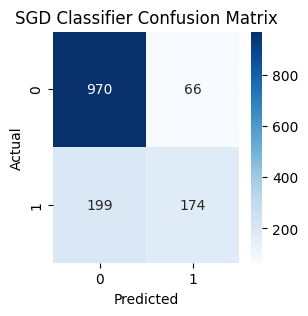

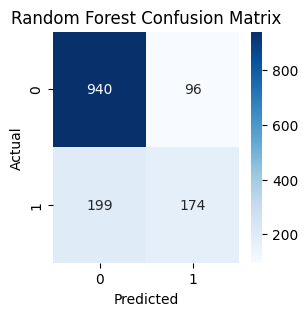

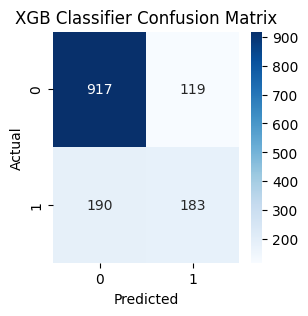

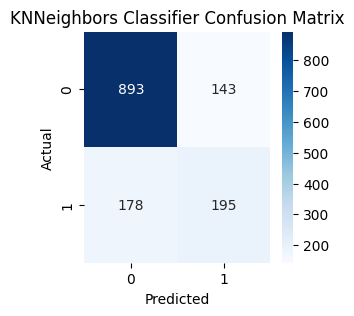

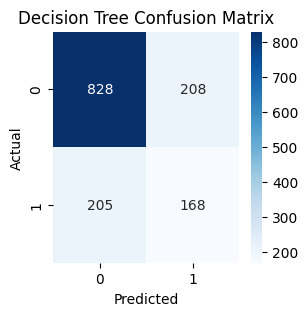

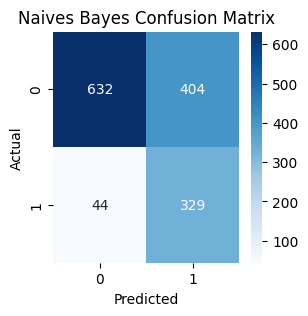

Training, testing and evaluation of all the selected models is now completed


In [ ]:
classifiers = [
               [LogisticRegression(), 'Logistic Regression'],
               [LinearSVC(), 'LinearSVC'],
               [SVC(), 'SVC'],
               [SGDClassifier(), 'SGD Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [XGBClassifier(), 'XGB Classifier'],
               [KNeighborsClassifier(), 'KNNeighbors Classifier'],
               [DecisionTreeClassifier(random_state = 42), 'Decision Tree'],
               [GaussianNB(), 'Naives Bayes'],


              ]

# Initialing dictionaries that will hold the output of the chosen evaluation metrics
acc_list = {}
precision_list = {}
recall_list = {}
f1_list = {}
roc_list = {}

# Loop to train, test, generate metrics and create confusion matrices for each algorithm
for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train, y_train)
    model_name = classifier[1]

    pred = model.predict(X_test.values)

    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    f_score = f1_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)

    acc_list[model_name] = str(round(a_score*100, 2)) + '%'
    precision_list[model_name] = str(round(p_score*100, 2)) + '%'
    recall_list[model_name] = str(round(r_score*100, 2)) + '%'
    f1_list[model_name] = str(round(f_score*100, 2)) + '%'
    roc_list[model_name] = str(round(roc_score*100, 2)) + '%'

    #Creating a Confusion Matrix
    cm = confusion_matrix(y_test, pred)

    #Visualizing confusion matrix
    plt.figure(figsize = (3,3))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    if model_name == classifiers[-1][1]:
        print('Training, testing and evaluation of all the selected models is now completed')

In [ ]:
print('Consolidated Report')
s1 = pd.DataFrame([acc_list,precision_list,recall_list,f1_list,roc_list], index = ['Accuracy Score','Precision Score','Recall Score','F1 Score','ROC Score'])
s1.head()

Consolidated Report


,Logistic Regression,LinearSVC,SVC,SGD Classifier,Random Forest,XGB Classifier,KNNeighbors Classifier,Decision Tree,Naives Bayes
Accuracy Score,81.97%,81.26%,81.05%,81.19%,79.06%,78.07%,77.22%,70.69%,68.2%
Precision Score,68.89%,67.99%,68.28%,72.5%,64.44%,60.6%,57.69%,44.68%,44.88%
Recall Score,58.18%,55.23%,53.08%,46.65%,46.65%,49.06%,52.28%,45.04%,88.2%
F1 Score,63.08%,60.95%,59.73%,56.77%,54.12%,54.22%,54.85%,44.86%,59.49%
ROC Score,74.36%,72.93%,72.1%,70.14%,68.69%,68.79%,69.24%,62.48%,74.6%


**HYPER-PARAMETER TUNNING USING : GridSearchCV**

In [ ]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Initialing dictionaries that will hold the output of the chosen evaluation metrics
acc_list = {}
precision_list = {}
recall_list = {}
f1_list = {}
roc_list = {}

# Define parameter grids for each classifier
param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs'],
        'penalty': ['l1', 'l2']
    },
    'LinearSVC': {
        'C': [0.1, 1, 10],
        'loss': ['hinge', 'squared_hinge'],
        'penalty': ['l1', 'l2']
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'SGD Classifier': {
        'alpha': [0.0001, 0.001, 0.01],
        'loss': ['hinge', 'log'],
        'penalty': ['l1', 'l2']
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'XGB Classifier': {
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5]
    },
    'KNeighbors Classifier': {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Naive Bayes': {}
}

# Define classifiers
classifiers = [
    (LogisticRegression(), 'Logistic Regression'),
    (LinearSVC(), 'LinearSVC'),
    (SVC(), 'SVC'),
    (SGDClassifier(), 'SGD Classifier'),
    (RandomForestClassifier(), 'Random Forest'),
    (XGBClassifier(), 'XGB Classifier'),
    (KNeighborsClassifier(), 'KNeighbors Classifier'),
    (DecisionTreeClassifier(), 'Decision Tree'),
    (GaussianNB(), 'Naive Bayes')
]

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Classifier', 'Best Parameters', 'Best Score', 'Accuracy Score', 'Precision Score', 'Recall Score', 'F1 Score', 'ROC AUC Score'])

# Loop through each classifier and perform GridSearchCV
for classifier, name in classifiers:
    param_grid = param_grids.get(name, {})
    grid_search = GridSearchCV(classifier, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    param_grid_name = name


    # Store results in the DataFrame
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print(best_params)
    #best_score = grid_search.best_score_)

    # Calculate additional evaluation metrics
    y_predd = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_predd)
    precision = precision_score(y_test, y_predd)
    recall = recall_score(y_test, y_predd)
    f1 = f1_score(y_test, y_predd)
    roc_auc = roc_auc_score(y_test, y_predd)


    acc_list[param_grid_name] = str(round( accuracy*100, 2)) + '%'
    precision_list[param_grid_name] = str(round(precision*100, 2)) + '%'
    recall_list[param_grid_name] = str(round(recall*100, 2)) + '%'
    f1_list[param_grid_name] = str(round(f1*100, 2)) + '%'
    roc_list[param_grid_name] = str(round(roc_auc*100, 2)) + '%'


{'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
{'C': 10, 'loss': 'squared_hinge', 'penalty': 'l2'}
{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
{'alpha': 0.001, 'loss': 'hinge', 'penalty': 'l2'}
{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
{'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 1}
{'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'uniform'}
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
{}


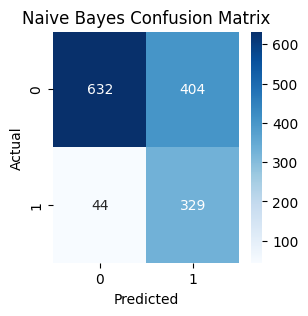

In [ ]:
    #Creating a Confusion Matrix
    cm = confusion_matrix(y_test, pred)

    #Visualizing confusion matrix
    plt.figure(figsize = (3,3))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'{param_grid_name} Confusion Matrix')
    plt.show()


In [ ]:
print('Consolidated Report')
s2 = pd.DataFrame([acc_list,precision_list,recall_list,f1_list,roc_list], index = ['Accuracy Score','Precision Score','Recall Score','F1 Score','ROC Score'])
s2.head()

Consolidated Report


,Logistic Regression,LinearSVC,SVC,SGD Classifier,Random Forest,XGB Classifier,KNeighbors Classifier,Decision Tree,Naive Bayes
Accuracy Score,81.83%,81.26%,81.26%,82.19%,80.91%,81.41%,77.71%,77.29%,68.2%
Precision Score,68.34%,68.11%,69.4%,69.06%,68.57%,68.69%,58.7%,58.98%,44.88%
Recall Score,58.45%,54.96%,52.28%,59.25%,51.47%,54.69%,53.35%,46.65%,88.2%
F1 Score,63.01%,60.83%,59.63%,63.78%,58.81%,60.9%,55.9%,52.1%,59.49%
ROC Score,74.35%,72.85%,71.99%,74.85%,71.49%,72.86%,69.92%,67.48%,74.6%


**VotingClassifier with RandomizedSearchCV**
An ENSEMBLE METHOD FOR HYPER-PARAMETER TUNNING

In [ ]:
!pip install --upgrade scikit-learn
# Upgrade scikit-learn to the latest version to include '_fit_context'
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from scipy.stats import uniform, randint

# Initialing dictionaries that will hold the output of the chosen evaluation metrics
acc_list = {}
precision_list = {}
recall_list = {}
f1_list = {}
roc_list = {}

# Define the classifiers
classifiers = [
    ('log_reg', LogisticRegression()),
    ('svc', SVC(probability=True)),
    ('rf', RandomForestClassifier()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('nb', GaussianNB())
]

# Define a voting classifier
voting_clf = VotingClassifier(estimators=classifiers, voting='soft')

# Define hyperparameter grid
param_grid = {
    'log_reg__C': uniform(0.01, 10),
    'svc__C': uniform(0.01, 10),
    'svc__gamma': uniform(0.001, 1),
    'rf__n_estimators': randint(10, 200),
    'rf__max_depth': randint(3, 20),
    'xgb__n_estimators': randint(50, 200),
    'xgb__learning_rate': uniform(0.01, 0.3),
    'knn__n_neighbors': randint(1, 30),
    'dt__max_depth': randint(3, 20),
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=voting_clf, param_distributions=param_grid, n_iter=10, cv=3, scoring='accuracy', random_state=42, verbose=2, n_jobs=-1)


# Fit the model
random_search.fit(X_train, y_train)

# Best estimator
best_voting_clf = random_search.best_estimator_

# Predict on test data
y_pred = best_voting_clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
roc_auc = roc_auc_score(y_test, y_pred, multi_class='ovr')


acc_list[param_grid_name] = str(round( accuracy*100, 2)) + '%'
precision_list[param_grid_name] = str(round(precision*100, 2)) + '%'
recall_list[param_grid_name] = str(round(recall*100, 2)) + '%'
f1_list[param_grid_name] = str(round(f1*100, 2)) + '%'
roc_list[param_grid_name] = str(round(roc_auc*100, 2)) + '%'


# Print results
print(f'Best parameters: {random_search.best_params_}')
print(f'Accuracy Score: {accuracy}')
print(f'Precision Score: {precision}')
print(f'Recall Score: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{cm}')


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'dt__max_depth': 4, 'knn__n_neighbors': 20, 'log_reg__C': 2.4202546602601167, 'rf__max_depth': 9, 'rf__n_estimators': 181, 'svc__C': 4.961769101112702, 'svc__gamma': 0.035388521115218396, 'xgb__learning_rate': 0.28279612062363463, 'xgb__n_estimators': 99}
Accuracy Score: 0.8126330731014905
Precision Score: 0.8132845100739089
Recall Score: 0.8126330731014905
F1 Score: 0.8129515123144527
ROC AUC Score: 0.7610654507437349
Confusion Matrix:
[[902 134]
 [130 243]]


In [ ]:
print('Consolidated Report')
s3 = pd.DataFrame([acc_list,precision_list,recall_list,f1_list,roc_list], index = ['Accuracy Score','Precision Score','Recall Score','F1 Score','ROC Score'])
s3.head()

Consolidated Report


,Naive Bayes
Accuracy Score,81.26%
Precision Score,81.33%
Recall Score,81.26%
F1 Score,81.3%
ROC Score,76.11%


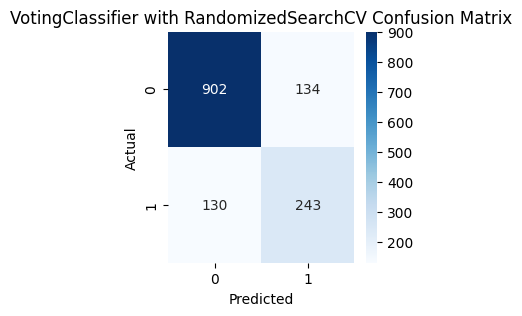

In [ ]:
 #Creating a Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

#Visualizing confusion matrix
plt.figure(figsize = (3,3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('VotingClassifier with RandomizedSearchCV Confusion Matrix')
plt.show()